In [1]:
import pandas as pd

In [20]:
df1 = pd.read_csv("/content/Fraud_check.csv")

In [21]:
df1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [23]:
df.select_dtypes(include=['object']).columns

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [24]:
df['IncomeRisk'] = ['Risky' if income <= 30000 else 'Good' for income in df['Taxable.Income']]


In [25]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,IncomeRisk
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   IncomeRisk       600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [27]:
df['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

Index([Axes(0.125,0.11;0.775x0.77), Axes(0.125,0.11;0.775x0.77),
       Axes(0.125,0.11;0.775x0.77), Axes(0.125,0.11;0.775x0.77)],
      dtype='object')

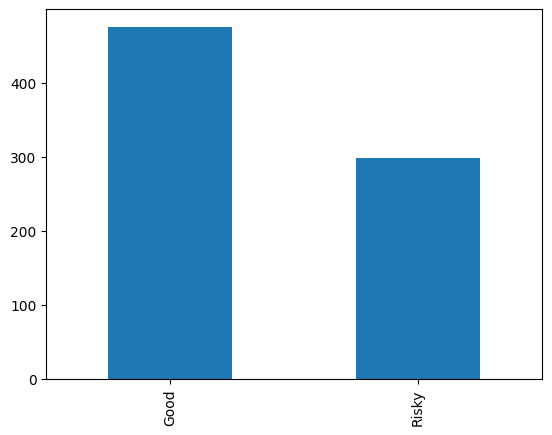

In [28]:
df.select_dtypes(include=['object']).columns.map(lambda x: df[x].value_counts().plot(kind='bar'))

<Axes: xlabel='IncomeRisk'>

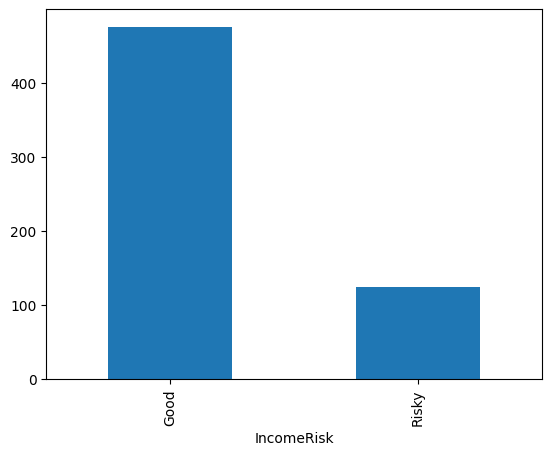

In [29]:
df.groupby('IncomeRisk').size().plot(kind='bar')

<Axes: xlabel='IncomeRisk'>

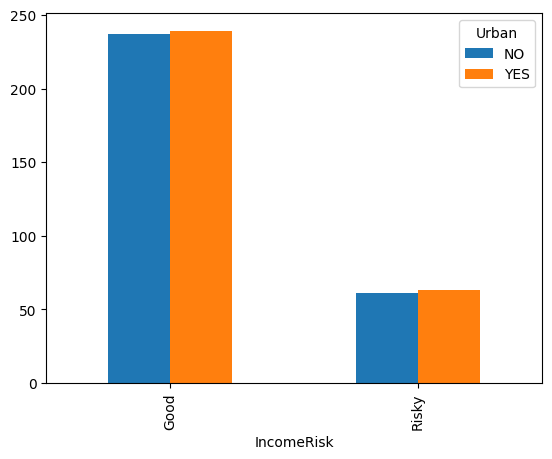

In [30]:
df.groupby(['IncomeRisk', 'Urban']).size().unstack().plot(kind='bar')

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [32]:
for col in df.select_dtypes(include=['object']).columns:
  df[col] = encoder.fit_transform(df[col])

In [33]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,IncomeRisk
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
 6   IncomeRisk       600 non-null    int64
dtypes: int64(7)
memory usage: 32.9 KB


In [35]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,IncomeRisk
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [36]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,IncomeRisk
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


In [37]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,IncomeRisk
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [40]:
x = df.iloc[:, :-1]

In [41]:
y = df.iloc[:, -1]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25)

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model = DecisionTreeClassifier(criterion='gini', max_depth=None)

In [46]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
model.predict(x_train)
model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [48]:
print("Accuracy on training set:", model.score(x_train, y_train))
print("Accuracy on test set:", model.score(x_test, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 1.0


In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [1.         0.99166667 1.         1.         1.        ]
Average cross-validation score: 0.9983333333333334


In [50]:
scores = cross_val_score(model, x, y, cv=10)
#print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())
print("Accuracy on training set:", model.score(x_train, y_train))
print("Accuracy on test set:", model.score(x_test, y_test))

Average cross-validation score: 0.9983333333333334
Accuracy on training set: 1.0
Accuracy on test set: 1.0


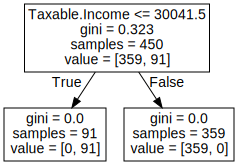

In [51]:
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None, feature_names=x.columns)
graph = graphviz.Source(dot_data)
graph

In [ ]:
## i have got pure regions

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

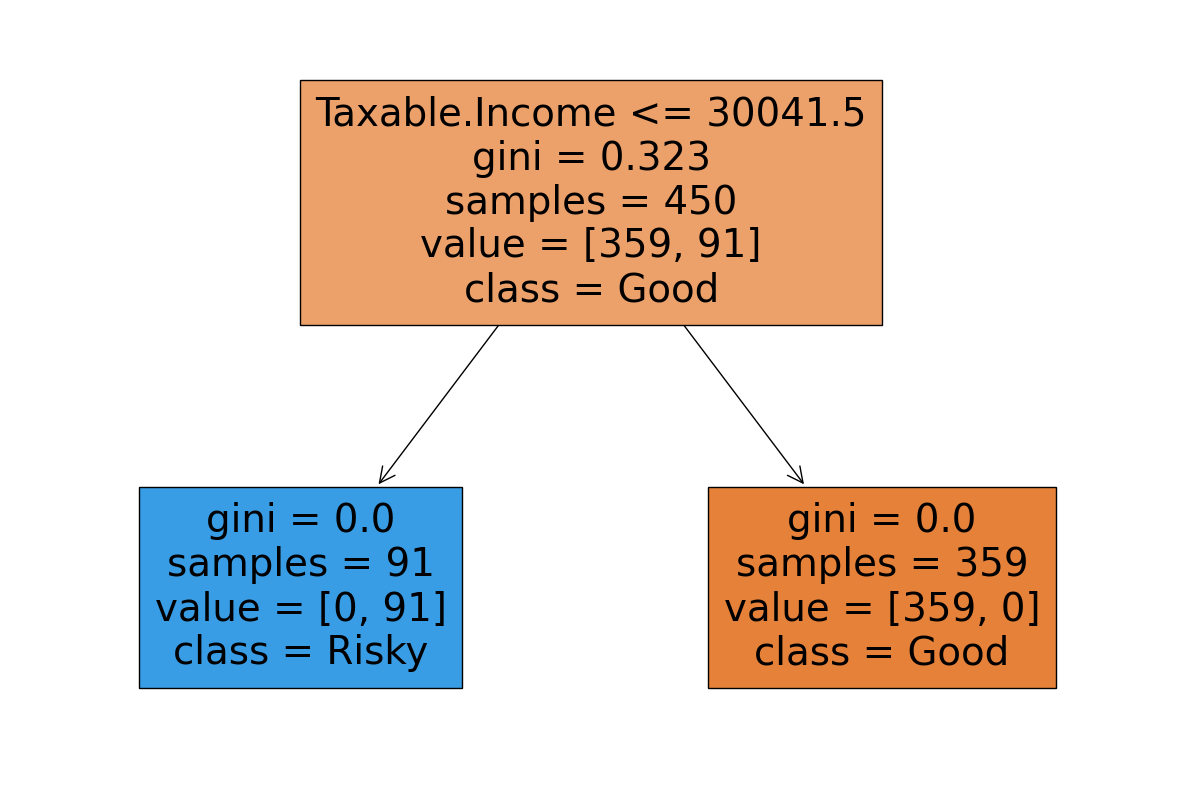

In [55]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=['Good', 'Risky'])
plt.show()